# 0. Imports

In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
import imutils
from imutils.object_detection import non_max_suppression

# 1. Person Detection

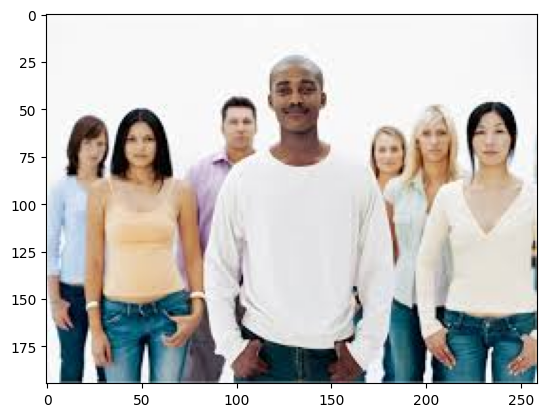

In [14]:
im = cv2.imread('persons1.jpg')
#im = cv2.imread('persons2.jpg')
#im = cv2.imread('persons3.jpg')

plt.imshow(im[:,:,::-1])

In [28]:
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

(rects, weights) = hog.detectMultiScale(im, winStride=(4, 4), padding=(10, 10), scale=0.75)



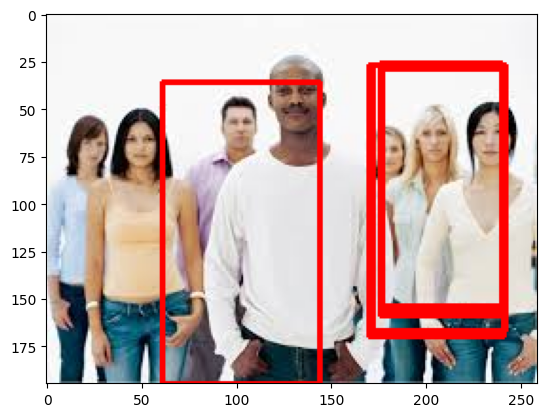

In [37]:
rectangles = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rects])
rects_NMS = non_max_suppression(rectangles, probs=None, overlapThresh=1.05)

for (x1,y1,x2,y2) in rects_NMS:
    cv2.rectangle(im, (x1,y1), (x2,y2), (0,0,255), 2)

plt.imshow(im[:,:,::-1])

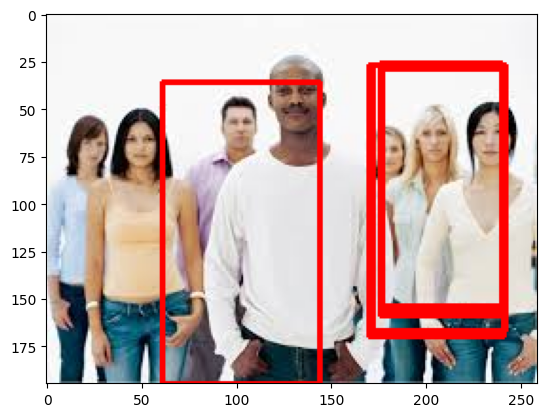

In [36]:
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

(rects, weights) = hog.detectMultiScale(im, winStride=(2, 2), padding=(4, 4), scale=1.01)


rectangles = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rects])

for (x1,y1,x2,y2) in rectangles:
    cv2.rectangle(im, (x1,y1), (x2,y2), (0,0,255), 2)

plt.imshow(im[:,:,::-1])

# 2. Person Detection on Video with HOG

In [ ]:
#must have a .mp4 video in this folder with name people_video.mp4

hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

cap = cv2.VideoCapture('people_video.mp4')

while cap.isOpened():
    rect, image = cap.read()
    if rect:
        image = imutils.resize(image, width=min(400, image.shape[1]))
        (rects, _) = hog.detectMultiScale(image, winStride=(4, 4), padding=(10, 10), scale=1.05)
        rectangles = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rects])

        for (x,y,h,w) in rectangles:
            cv2.rectangle(image, (x,y), (x+w,y+h), (0,0,255), 2)

        cv2.imshow("Image", image)
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break
    else:
        break
cap.release()
cv2.destroyAllWindows()

### RESIZING THE IMAGE WORKS POORLY, THE DETECTION IS NOT VERY GOOD IN THE VIDEO

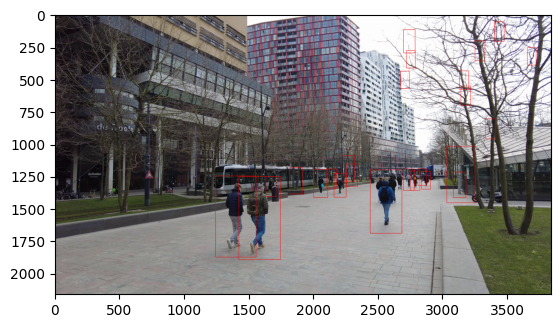

In [11]:
cap = cv2.VideoCapture('people_video.mp4')
rect, image = cap.read()

#image = imutils.resize(image, width=min(400, image.shape[1]))
(rects, weights) = hog.detectMultiScale(image, winStride=(4, 4), padding=(10, 10), scale=1.05)
rectangles = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rects])
for (x1,y1,x2,y2) in rectangles:
    cv2.rectangle(image, (x1,y1), (x2,y2), (0,0,255), 2)

plt.imshow(image[:,:,::-1])